###Assignment - 3

In [1]:
#1 
#Dataset downloaded
#Uploading the dataset

from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [3]:
#2
#Loading the dataset

import pandas as pd
import numpy as np

df = pd.read_csv(r'abalone.csv')
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


Text(0, 0.5, 'Count')

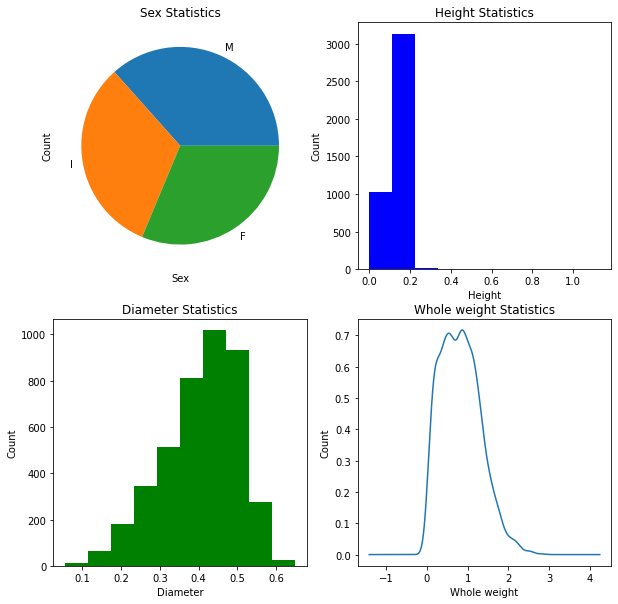

In [5]:
#3 Univariate analysis

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
counts = df['Sex'].value_counts()
plt.subplot(221)
plt.pie(counts, labels = counts.index)
plt.title('Sex Statistics')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.subplot(222)
plt.hist(df['Height'],color='blue')
plt.title('Height Statistics')
plt.xlabel('Height')
plt.ylabel('Count')

plt.subplot(223)
plt.hist(df['Diameter'],color='green')
plt.title('Diameter Statistics')
plt.xlabel('Diameter')
plt.ylabel('Count')

plt.subplot(224)
df['Whole weight'].plot(kind='density')
plt.title('Whole weight Statistics')
plt.xlabel('Whole weight')
plt.ylabel('Count')

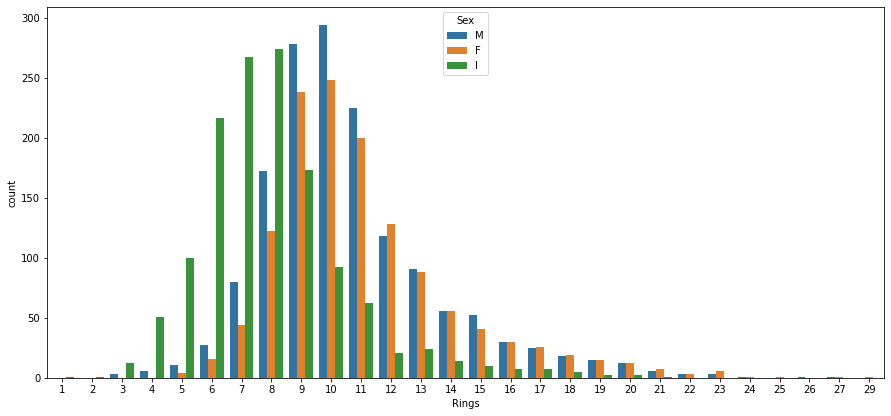

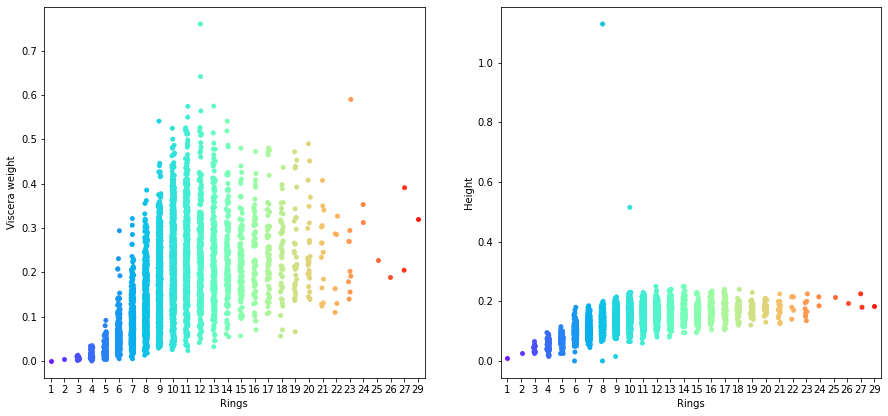

In [15]:
#3 Bivariate Analysis
import seaborn as sns

plt.figure(figsize=(15,15))

#Categorical vs Categorical
plt.subplot(2,1,1)
sns.countplot(data = df, x = 'Rings', hue = 'Sex')

plt.figure(figsize=(15,15))
#Continuous vs Continuous
plt.subplot(2,2,1)
sns.stripplot(x='Rings', y='Viscera weight', data=df, palette='rainbow')

plt.subplot(2,2,2)
sns.stripplot(x='Rings', y='Height', data=df, palette='rainbow')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e6288e50>,
      dtype=object)

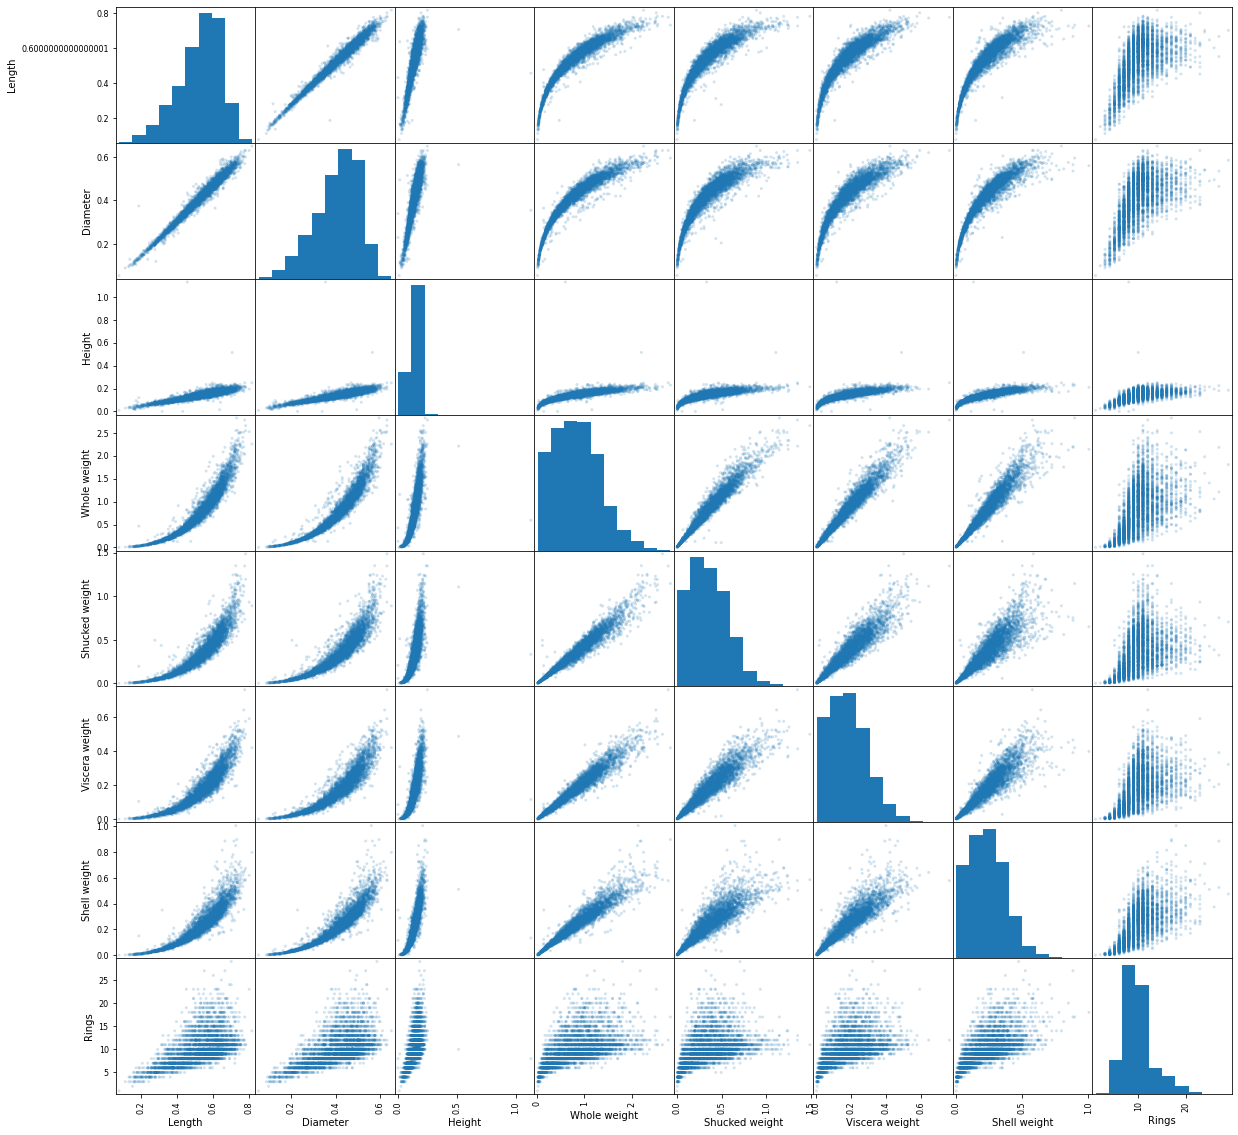

In [16]:
#3 Multivariate Analysis

pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(20,20))

In [17]:
#4
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [19]:
#5 Handling missing values

df.isnull().sum()    

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [21]:
#For Continuous variables 								
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Diameter'].fillna(df['Diameter'].mean(), inplace=True)
df['Whole weight'].fillna(df['Whole weight'].mean(), inplace=True)
df['Shucked weight'].fillna(df['Shucked weight'].mean(), inplace=True)
df['Viscera weight'].fillna(df['Viscera weight'].mean(), inplace=True)
df['Shell weight'].fillna(df['Shell weight'].mean(), inplace=True)
df['Rings'].fillna(df['Rings'].mean(), inplace=True)

#For Categorical variables
df['Sex'].fillna(df['Sex'].mode(), inplace=True)



In [22]:
#Ensuring again
print(df.isnull().sum())  

print('\n\Sex : ', df['Sex'].unique())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

\Sex :  ['M' 'F' 'I']


No. of Outliers :  43


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


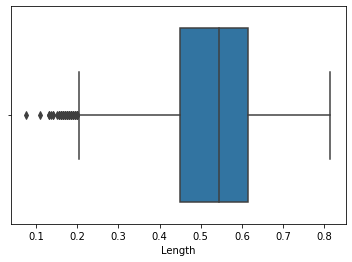

In [24]:
#6 Outlier detection - box plot 	
import seaborn as sns
sns.boxplot(df['Length'])
print('No. of Outliers : ', (df['Length'] < 0.2).sum())

In [25]:
#6 Outlier detection - zscore 	
from scipy import stats
zscore = np.abs(stats.zscore(df['Diameter']))
print(zscore)
print('No. of Outliers : ', np.shape(np.where(zscore>3)))

0       0.432149
1       1.439929
2       0.122130
3       0.432149
4       1.540707
          ...   
4172    0.424464
4173    0.323686
4174    0.676409
4175    0.777187
4176    1.482634
Name: Diameter, Length: 4177, dtype: float64
No. of Outliers :  (1, 13)


No. of Outliers :  33


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


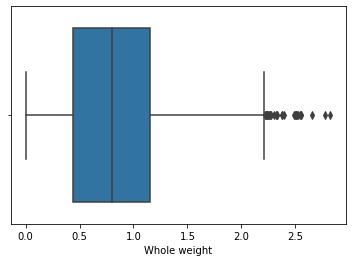

In [29]:
#6 Outlier detection - box plot 		
sns.boxplot(df['Whole weight'])
print('No. of Outliers : ', (df['Whole weight'] > 2.2).sum())

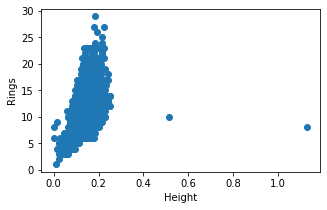

In [30]:
#6 Outlier detection - Scatter plot 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,3))
ax.scatter(df['Height'], df['Rings'])
 
# x-axis label
ax.set_xlabel('Height')
 
# y-axis label
ax.set_ylabel('Rings')
plt.show()

In [31]:
#6 Outlier detection - IQR 	
Q1 = df['Shucked weight'].quantile(0.25)
Q3 = df['Shucked weight'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upper=Q3 + 1.5 * IQR
lower=Q1 - 1.5 * IQR
count = np.size(np.where(df['Shucked weight'] >upper))
count = count + np.size(np.where(df['Shucked weight'] <lower))
print('No. of outliers : ', count)

0.316
No. of outliers :  48


In [34]:
#6 Outlier detection - 3 sigma 	

upper = df['Viscera weight'].mean() + (3 * df['Viscera weight'].std())
lower = df['Viscera weight'].mean() - (3 * df['Viscera weight'].std())
columns = df[ ( df['Viscera weight'] > upper ) | ( df['Viscera weight']<lower ) ]
print('Upper range : ', upper)
print('Lower range : ', lower)
print('No. of Outliers : ', len(columns))

Upper range :  0.5094363586315791
Lower range :  -0.1482491429265277
No. of Outliers :  22


In [35]:
#6 Outlier detection - 3 sigma 	

upper = df['Shell weight'].mean() + (3 * df['Shell weight'].std())
lower = df['Shell weight'].mean() - (3 * df['Shell weight'].std())
columns = df[ ( df['Shell weight'] > upper ) | ( df['Shell weight']<lower ) ]
print('Upper range : ', upper)
print('Lower range : ', lower)
print('No. of Outliers : ', len(columns))

Upper range :  0.6564388680356763
Lower range :  -0.17877714909864026
No. of Outliers :  27


In [36]:
#6 Removing Outliers
columns = ['Diameter', 'Length', 'Whole weight',  'Height', 'Shucked weight', 'Viscera weight', 'Shell weight']

for i in columns:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [37]:
#After outlier removal
columns = ['Diameter', 'Length', 'Whole weight',  'Height', 'Shucked weight', 'Viscera weight', 'Shell weight']

for i in columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3 + 1.5 * IQR
  lower=Q1 - 1.5 * IQR
  count = np.size(np.where(df[i] >upper))
  count = count + np.size(np.where(df[i] <lower))
  print('No. of outliers in ', i, ' : ', count)

No. of outliers in  Diameter  :  0
No. of outliers in  Length  :  0
No. of outliers in  Whole weight  :  0
No. of outliers in  Height  :  0
No. of outliers in  Shucked weight  :  0
No. of outliers in  Viscera weight  :  0
No. of outliers in  Shell weight  :  0


In [38]:
#7  Label Encoding
print('Before encoding : ', df['Sex'][0])
df['Sex'] = df['Sex'].astype('category')

df['Sex'] = df['Sex'].cat.codes
print('After encoding : ', df['Sex'][0])

df['Sex'].dtype

Before encoding :  M
After encoding :  2


dtype('int8')

In [39]:
df.dtypes

Sex                  int8
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [40]:
#Changing target column(Exited) as the last column

Exit = df['Rings']
df = df.drop('Rings', axis=1)
df = df.join(Exit)

In [41]:
df.head(1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [42]:
#8 Splitting dependent and independent variables
X = df.iloc[:, :-1]
print('Independent : \n', X.head(2))

Y = df.iloc[:, -1]
print('Dependent : \n', Y.head(2))

Independent : 
    Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   

   Viscera weight  Shell weight  
0          0.1010          0.15  
1          0.0485          0.07  
Dependent : 
 0    15
1     7
Name: Rings, dtype: int64


In [43]:
#9 Scaling
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

print('Before scaling : \n', X[1:3])
X = scaler.fit_transform(X)
print('\n\nAfter scaling : \n', X[1:3])

Before scaling : 
    Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1    2    0.35     0.265   0.090        0.2255          0.0995   
2    0    0.53     0.420   0.135        0.6770          0.2565   

   Viscera weight  Shell weight  
1          0.0485          0.07  
2          0.1415          0.21  


After scaling : 
 [[ 0.5        -1.18181818 -1.23076923 -1.         -0.80674631 -0.74841772
  -0.76802508 -0.8241206 ]
 [-0.5        -0.09090909 -0.03846154 -0.1        -0.17217147 -0.25158228
  -0.18495298 -0.12060302]]


In [44]:
#10 Splitting data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3341, 8) (836, 8) (3341,) (836,)


In [45]:
#11 Build the model
from sklearn import linear_model as lin_mod
model = lin_mod.LinearRegression()

In [48]:
#12 Training the model
LinearRegression = model.fit(X_train, Y_train)
r_sq = model.score(X_train, Y_train)
print(f"Determination coeeficient: {r_sq}")

Determination coeeficient: 0.5393102460713417


In [49]:
#13 Testing the model
Y_pred = model.predict(X_test)

In [51]:
print('Predicted values : ', Y_pred[:5])

Predicted values :  [9.506537   8.67639666 5.89568114 6.63750788 4.84326546]


In [53]:
#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2 = r2_score(Y_test, Y_pred)
mean_squared_error = mean_squared_error(Y_test, Y_pred)
rmse = (np.sqrt(mean_squared_error))

print('R2 score : ', r2)
print('Mean squared error : ', mean_squared_error)
print('Root Mean squared error : ', rmse)

R2 score :  0.5277374155899712
Mean squared error :  4.817705300077402
Root Mean squared error :  2.194927174208156
